In [1]:
from adam_impact_study.types import (
    ImpactorOrbits,
    Observations,
    ResultsTiming,
    WindowResult,
    ImpactorResultSummary,
)
import ray
from adam_impact_study.analysis.main import (
    run_all_analysis,
    collect_all_results,
    summarize_impact_study_results,
    make_analysis_plots,
)
from adam_impact_study.analysis.collect import (
    collect_all_window_results_new,
    create_missing_window_results,
    collect_all_observations,
)

In [2]:
ray.shutdown()

In [3]:
run_dir = "../march_run/results"
out_dir = "../march_analysis/"

In [4]:
# impactor_orbits, observations, results_timing, window_results = collect_all_results(run_dir, max_processes=10)

In [5]:
# import pathlib
# pathlib.Path("../march_analysis/").mkdir(parents=True, exist_ok=True)
# impactor_orbits.to_parquet(
#     "../march_analysis/impactor_orbits.parquet"
# )
# observations.to_parquet(
#     "../march_analysis/observations.parquet"
# )
# results_timing.to_parquet(
#     "../march_analysis/results_timing.parquet"
# )
# window_results.to_parquet(
#     "../march_analysis/window_results.parquet"
# )


In [6]:
impactor_orbits = ImpactorOrbits.from_parquet(
    "../march_analysis/impactor_orbits.parquet"
)
observations = Observations.from_parquet(
    "../march_analysis/observations.parquet"
)
results_timing = ResultsTiming.from_parquet(
    "../march_analysis/results_timing.parquet"
)
window_results = WindowResult.from_parquet(
    "../march_analysis/window_results.parquet"
)


In [7]:
# summary_results = summarize_impact_study_results(
#     impactor_orbits, observations, results_timing, window_results, out_dir, max_processes=10
# )
# summary_results.to_parquet(
#     "../march_analysis/summary_results.parquet"
# )


In [8]:
summary_results = ImpactorResultSummary.from_parquet(
    "../march_analysis/summary_results.parquet"
)



In [9]:
make_analysis_plots(summary_results, window_results, out_dir)

INFO:adam_impact_study.analysis.plots:Generated warning time histogram
INFO:adam_impact_study.analysis.plots:Generated warning time by diameter year plot
INFO:adam_impact_study.analysis.plots:Generated realization time histogram
INFO:adam_impact_study.analysis.plots:Generated discoveries by diameter plot
INFO:adam_impact_study.analysis.plots:Generated runtime by diameter plot
INFO:adam_impact_study.analysis.plots:Generated incomplete by diameter plot
INFO:adam_impact_study.analysis.plots:Generated arclength by diameter plot
INFO:adam_impact_study.analysis.plots:Generated discovered by diameter decade plot
INFO:adam_impact_study.analysis.plots:Generated percentage realized plot
INFO:adam_impact_study.analysis.plots:Generated max impact probability plot
INFO:adam_impact_study.analysis.plots:Generated iawn threshold plot
INFO:adam_impact_study.analysis.plots:Generated arc length by diameter decade plot
INFO:adam_impact_study.analysis.plots:Generated 1% IP threshold percentage vs elements 

In [10]:
import pyarrow.compute as pc
pc.sum(pc.equal(summary_results.observations, 0))

<pyarrow.UInt64Scalar: 7369>

In [11]:
pc.sum(summary_results.observed_but_not_discovered())

<pyarrow.UInt64Scalar: 3198>

2902.0612820166643


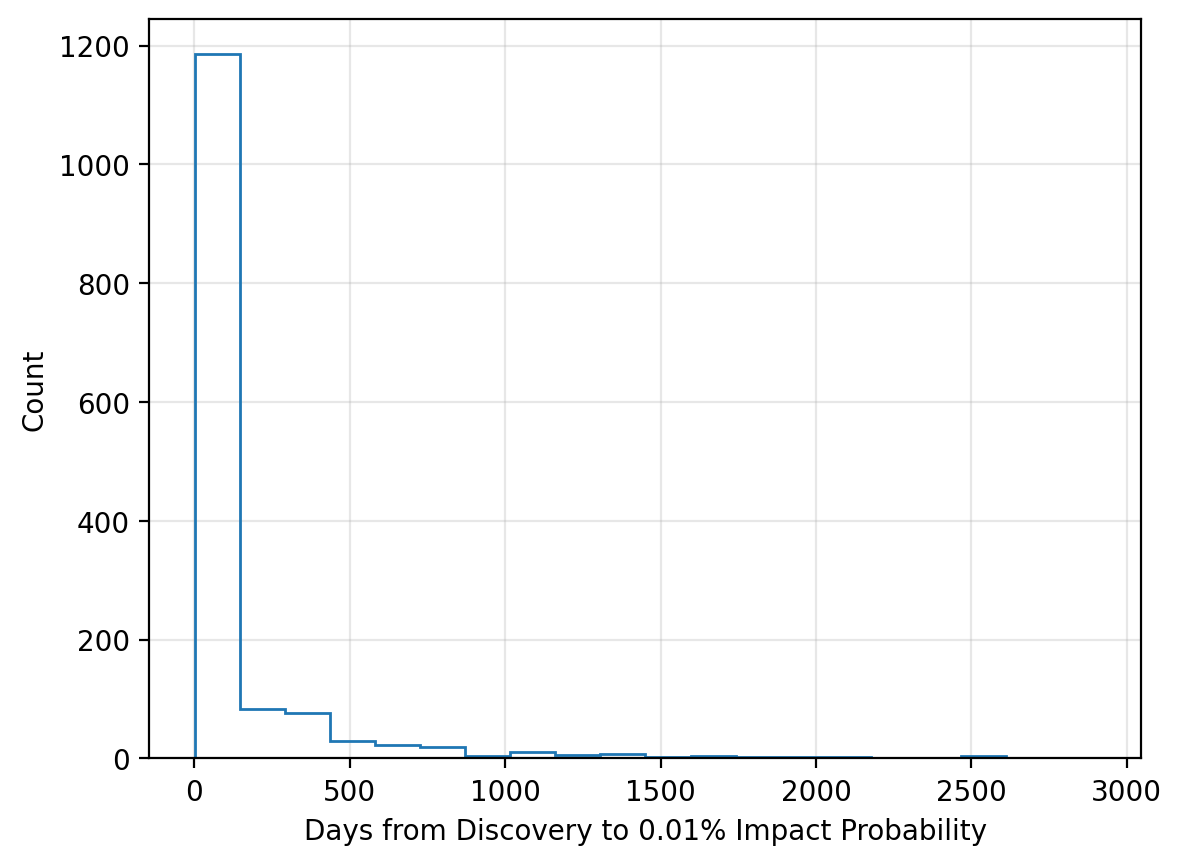

In [24]:
import numpy as np
import matplotlib.pyplot as plt
# Filter to only discovered objects
discovered = summary_results.apply_mask(summary_results.discovered())

# Calculate days between discovery and 0.01% threshold
# days_to_threshold = discovered.days_discovery_to_1_percent().to_numpy(zero_copy_only=False)
days_to_threshold = discovered.days_discovery_to_0_dot_01_percent().to_numpy(zero_copy_only=False)

# Filter out all negative values and 0
days_to_threshold = days_to_threshold[days_to_threshold > 0.5]
# Replace all negative values with 0
# days_to_threshold = np.maximum(days_to_threshold[days_to_threshold <= 400], 0)
# Remove nan values
days_to_threshold = days_to_threshold[~np.isnan(days_to_threshold)]
days_to_threshold = days_to_threshold[days_to_threshold <= 100]

print(np.max(days_to_threshold))

# Create histogram
fig, ax = plt.subplots(1, 1, dpi=200)
ax.hist(days_to_threshold, bins=20, histtype='step')
ax.set_xlabel('Days from Discovery to 0.01% Impact Probability')
ax.set_ylabel('Count') 
ax.grid(True, alpha=0.3)
plt.show()
